### Advanced Time Series

이번 시간에서는 Financial Analysis의 최신 방법론과 이슈들에 대해 살펴보기로 한다

#### 1. Fractionally Differentiated Series

대부분의 금융 시계열 분석은 두가지 상황에서 딜레마에 빠진다
1. Box-Jenkins : log difference 데이터는 정상성을 가지지만, market memory를 가지지 않는다
2. Engle-Granger : log price 계열은 market memory를 가진다. 하지만 비정상성을 얻게 된다. Cointegration은 비정상성 시계열에서 회귀모형을 작동 가능하게 하지만 매우 제한적인 상황에서 발견되며, Cointegration의 안정성도 신뢰가 좋다고는 볼 수 없다

Fractional Difference는 ADF 검정 결과를 지키는 최소한의 차분계수($d$)통해 market memory와 stationarity를 모두 포함하는 변환을 해주는 통계학 방법이다

**1.1 Methodology**

실수값인 feature $\{X_t\}$에 적용한 backshift 연산자 $B$를 가정해 보자. 여기서 $k \geq 0$인 모든 정수에 대해 $B^kX_t = X_{t-k}$이다. 양의 정수 $n$에 $(x+y)^n = \sum_{k=0}^n {n \choose k} x^k y^{n-k} = \sum_{k=0}^n {n \choose k}x^{n-k}k^k$라는 것에 주목하자. 실수 $d$에서 $(1+x)^d = \sum_{k=0}^\infty {d \choose k} x^k$ 즉, 이항 계열이다. Fractionally differentiated model에서 지수 $d$는 실수값이 가능하고, 다음 형식의 이항 계열 확장을 따른다

$$\begin{matrix}
(1-B)^d = \sum_{k=0}^\infty {d \choose k}(-B)^k &=& \sum_{k=0}^\infty \frac{\prod_{i=0}^{k-1}(d-i)}{k!} \\
       &=& \sum_{k=0}^\infty (-B)^k \prod_{i=0}^{k-1}\frac{d-i}{k-i} \\
       &=& 1 - dB + \frac{d(d-1)}{2!}B^2 - \frac{d(d-1)(d-2)}{3!}B^3 + \cdots
\end{matrix}$$

**1.2 Long Memory**

양의 실수 $d$가 기억을 유지하는 법을 알아보도록 하자. 아래의 산술 계열은 내적으로 이뤄져 있다

$$\tilde X_t = \sum_{k=0}^\infty \omega_k X_{t-k}$$

여기서 가중값 $\omega$는

$$\omega = \Big\{
1, -d, \frac{d(d-1)}{2!}, -\frac{d(d-1)(d-2)}{3!}, \cdots, (-1)^k \prod_{i=0}^{k-1} \frac{d-i}{k!}, \cdots
\Big\}$$

그리고 값 $X$는

$$X = \{X_t, X_{t-1}, X_{t-2}, X_{t-3}, \dots, X_{t-k}, \dots\}$$

이다.

$d$가 양의 정수일 때 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>d$이고, 이 지점을 넘어선 market memory는 소멸된다. 예를들어, $d=1$일 경우 수익률을 계산하기 위해 사용하는 차분계수이다. 여기서 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>1$이고 $\omega = \{1,-1,0,0,\cdots \}$이다

가중값 $\omega$의 sequence를 살펴보면 $\omega_0 = 1$이고, $k = 0, \dots, \infty$에 대해서 가중값은 반복적으로 다음과 같이 생성된다.

$$\omega_k = -\omega_{k-1}\frac{d-k+1}{k}$$

**1.3 Stationarity with Maximum Memory Preservation**

Time series $\{X_t\}_{t=1, \dots, T}$를 고려해 보자. Fixing-width window fractional difference 방법을 이 계열에 적용하면 Fractional differentiated Series $\{\tilde X_t\}_{t=l^*, \dots, T}$이 정상성을 가지도록 하는 최소의 차분계수 $d^*$를 구할 수 있다. 이 계수는 정상성을 얻기 위해 없애야 하는 기억의 양을 정량화 한다. $\{\tilde X_t\}_{t=l^*, \dots, T}$가 이미 stationary하다면 $d^*=0$이다

$\{\tilde X_t\}_{t=l^*, \dots, T}$가 unit root을 가지고 있다면 $d^* <1$이다. $\{\tilde X_t\}_{t=l^*, \dots, T}$가 폭발적 행태를 보인다면 $d^* >1$이다. 이 중 $0<d^* <1$인 경우는 원시계열이 약간의 비정상성을 가지는 경우로, 이 경우 정상성을 위해 차분이 필요하지만, 1차 차분을 하게 되면 원시계열에 담겨 있는 market memory와 유의미한 신호를 제거하게 된다

#### example 1

yfinance library를 통해 2015년 1월 1일부터 2023년 7월 31일까지의 Apple의 주가를 import하라. 작성된 함수를 이용하여 아래의 물음에 답하라

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

start_date = '2015-01-01'
end_date = '2023-08-01'

apple = yf.download('AAPL', start = start_date, end = end_date).iloc[:,[0,1,2,3,5]]
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,47460200


**1.1 Long Memory**

닫힌 구간 [0,2]까지 0.1구간별로 차분계수 $d$를 검정하여 Augmented Dickey Fuller test 값이 유의수준 5%(신뢰구간 95%)를 통과하는 최소의 차분계수를 구하여라. $d$의 값이 0에 가까울수록 어떤 insight를 얻을 수 있는가?

In [31]:
import AdvancedTimeSeries as ats

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(apple).dropna()
        df2 = ats.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunl

d: 0.1, error: division by zero
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: Invalid input, x is constant
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.075185,9.518548e-01,1.0,2155.0,-2.862882,1.000000
0.5,-1.260632,6.469853e-01,1.0,5.0,-3.929280,0.887011
0.6,-2.154825,2.230478e-01,1.0,13.0,-3.127149,0.556117
0.7,-3.912521,1.944609e-03,1.0,37.0,-2.943539,0.181059
0.8,-8.264837,4.970473e-13,1.0,107.0,-2.888955,0.146515
0.9,-13.747610,1.065264e-25,1.0,377.0,-2.869237,0.187848
1.0,-34.497045,0.000000e+00,1.0,2154.0,-2.862883,0.023718
1.1,-26.727279,0.000000e+00,1.0,1052.0,-2.864291,-0.003630
1.2,-29.551898,0.000000e+00,1.0,1114.0,-2.864138,0.002519
1.3,-34.233119,0.000000e+00,1.0,1318.0,-2.863735,0.006049


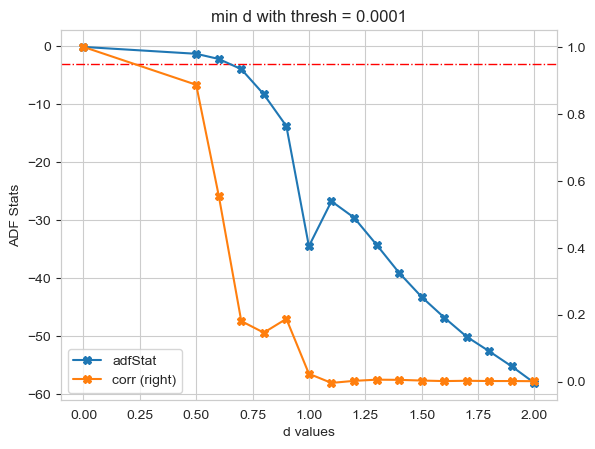

In [32]:
f,ax = plt.subplots()
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats');
display(out)

유의수준 5%이내인 최소의 $d$값은 0.6이다. $d$의 값이 0에 가까울수록 시계열이 최소의 차분만으로 정상성을 가진다는 뜻이므로, 원시계열이 효율적이라는 것을 유추해낼 수 있다

**1.2 Fixing window Fractional Differentiated Series**

함수 `fracDiff_FFD`는 윈도우를 고정하고 실수 차원의 차분 시계열을 추정하는 함수이다. 함수에 대해 적절한 방법으로 plotting하고 histogram을 확인하라

Text(0.5, 1.0, 'Fixing Window Fractional Differentiated Series')

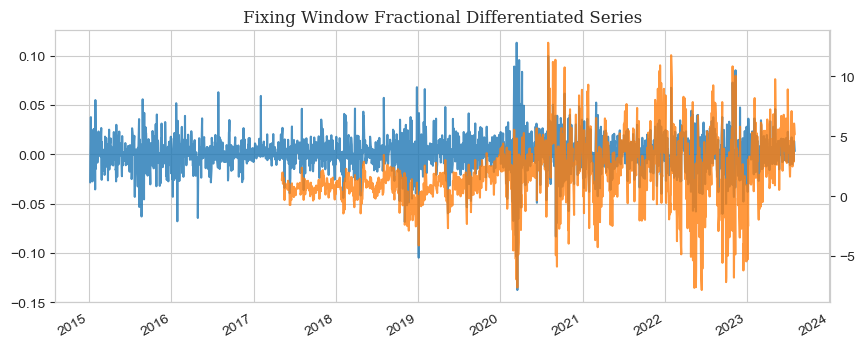

In [33]:
plt.figure(figsize = (10,4))
plt.plot(np.log(apple.Close / apple.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff_FFD(apple, 0.6).Close.plot(secondary_y = True, alpha = 0.8)
plt.title('Fixing Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

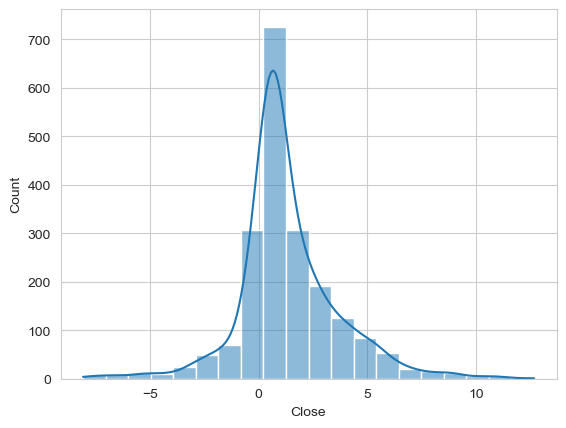

In [34]:
import seaborn as sns
sns.histplot(ats.fracDiff(apple, 0.6).Close, kde = True, bins = 20)

fixing window의 경우 양의 왜도와 높은 첨도를 가진다

**1.3 Expanding window Fractional Differentiated Series**

함수 `fracDiff`는 윈도우를 확장하며 실수 차원의 차분 시계열을 추정하는 함수이다. 함수에 대해 적절한 방법으로 plotting하고 histogram을 확인하라

Text(0.5, 1.0, 'Expanding Window Fractional Differentiated Series')

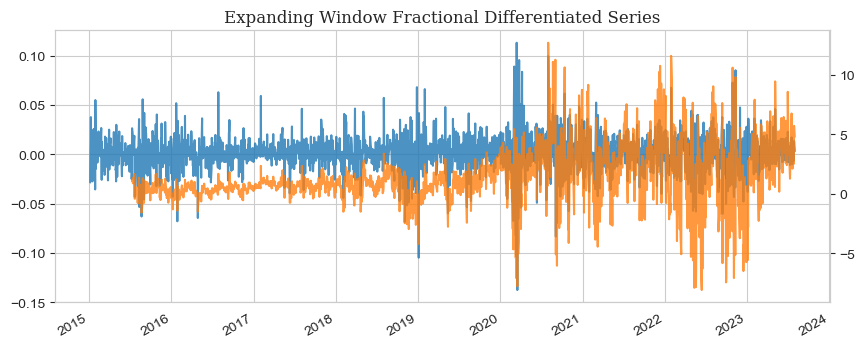

In [35]:
plt.figure(figsize = (10,4))
plt.plot(np.log(apple.Close / apple.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff(apple, 0.6).Close.plot(secondary_y = True, alpha = 0.8)
plt.title('Expanding Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

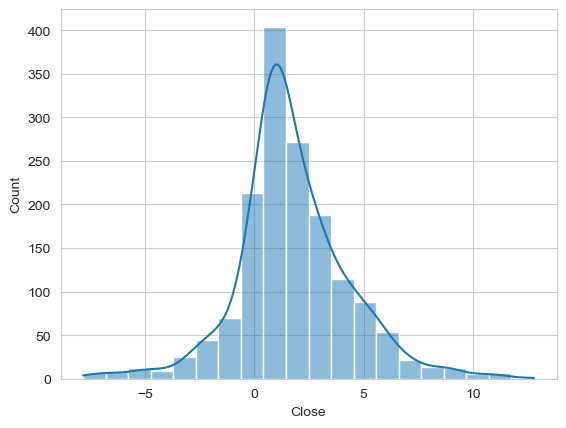

In [36]:
sns.histplot(ats.fracDiff_FFD(apple, 0.6).Close, kde = True, bins = 20)

fixing window 방식에 비해 왜도가 낮고 첨도 또한 낮아진 것을 볼 수 있다. 다만, 확장 윈도우 방식의 경우 초기 추정값의 신뢰성이 낮아질 수 있다

#### Exercise 1

2005년 1월 1일부터 2023년 7월 31일까지의 KOSPI 일별 주가지수 데이터를 import 하라. long memory를 최대한 보존하는 fractional difference 의 계수를 구하고 plotting하라. 한국 금융시장은 효율적인 시장인가?

**1.4 Supremum Augmented Dickey-Fuller Test**

표준 단위근과 공적분 검정은 stationary process와 주기적 붕괴 거품 모형을 효과적으로 구분하지 못하기 떄문에 거품을 탐지하는 도구로서 적절하지 못하다. 데이터에서 주기적으로 붕괴하는 패턴들은 잠재적으로 복발하는 프로세스보다는 단위근이나 정상성이 있는 AR process로부터 생성된 데이터처럼 보인다.(Phillips, Wu and Yu, 2011)
이들은 이 결함을 해결하고자 다음 식의 회귀식을 적합화할것을 제안하였다

$$\Delta y_t = \alpha + \beta y_{t-1} + \sum_{l=1}^L \gamma_l \Delta y_{t-l} + \epsilon_t, ~~~~~ \epsilon_t \sim \mathrm{NID}(0, \sigma_y^2)$$

여기서 아래의 귀무가설을 검정한다

$$H_0 : \beta \leq 0, ~~~~~ H_1 : \beta > 0$$

그리고 아래와 같은 검정을 제안하였다. $SDAF$는 앞의 회귀식을 각 마지막 시점 $T$에서 역방향 확장이 시작되는 시점들로 fitting한 후 다음을 계산한다

$$\mathrm{SADF}_t = \sup_{t_0 \in [1, t-\tau]} \{\mathrm{ADF}_{t_0, t}\} = \sup_{t_0 \in [1, t-\tau]} \Big\{ \frac{\hat \beta_{t_0, t}}{\hat \sigma_{\beta_{t_0},t}}\Big\}$$

여기서 $\hat \beta_{t_0, t}$는 $t_0$에서 시작해 $t$에서 끝나는 샘플에서 계산하고, $\tau$는 분석에 사용되는 최소 표본 길이, $t_0$는 역방향 확장 윈도우의 왼쪽 경계이고 $t = \tau, \dots, T$이다

#### example 2

준비된 AdvancedTimeSeries library의 `get_bSADF_test_statistics`함수는 상한 ADF검정치를 계산하는 함수이며, 각 parameter는 다음과 같은 기능을 한다

- `logP` : log price time series
- `minSL` : SADF 검정을 위한 초기 sample의 수
- `constant` : 회귀의 시간 추세
    - 'nc' : 시간 추세가 없이 단지 상수만 존재
    - 'ct' : 상수 존재 + 시간에 따른 선형 시간 추세 존재
    - 'ctt' : 상수 존재 + 2차 다항 시간의 추세 존재
- `lags` : ADF검정에 사용될 시차의 개수

2015년 1월 1일부터 2023년 7월 31일까지의 apple 주가에 대해서 상한 ADF 검정을 시행하라. 가격 계열은 로그화된 시계열을 사용하며 최소 샘플 기간은 100이고 lag는 1, 선형추세가 있다고 가정한다. SADF검정치에 따라 거품이 붕괴된 기간은 언제인가? 적절한 방법을 통해 시각화하라

In [37]:
sadf = ats.get_bSADF_test_statistics(np.log(apple.Close), minSL = 100, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum ADF test (Apple)')

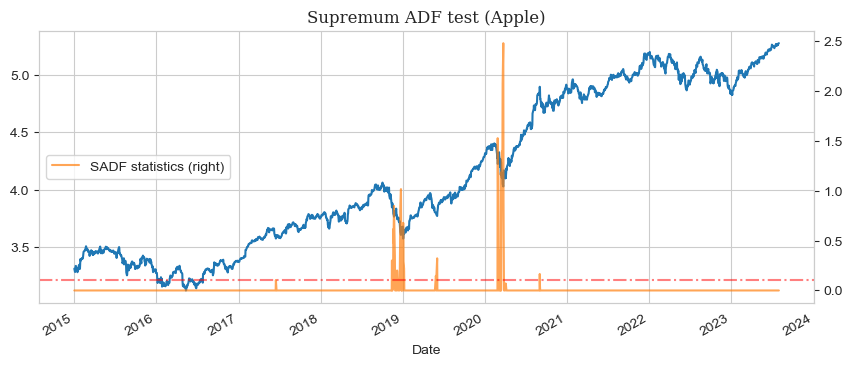

In [38]:
plt.figure(figsize = (10, 4))
plt.plot(np.log(apple.Close))
sadf.plot(secondary_y = True, alpha = 0.7, label = 'SADF statistics')
plt.legend(loc = 'center left')
plt.axhline(np.log(apple.Close).mean() * (1.65 * np.log(apple.Close).std() / np.sqrt(2158)), color = 'r', ls = '-.', alpha = 0.5)
plt.title('Supremum ADF test (Apple)', fontfamily = 'Serif', fontsize = 12)

#### 2. Market Entropy Features

가격은 수요와 공급의 힘에 대한 정보를 전달한다. 완전 시장이라면 가격을 예측할 수 없다. 각 관측값은 그시점에서의 모든 정보를 담기 땨문이다. 시장이 완전하지 못하면 가격은 불완전한 정보에 의해 형성되고, 특정 시장 참여자들이 정보를 더 많이 가지고 있으므로 비대칭정보 경쟁시장이 된다. 시장에 정보가 충분히 많이 반영되어 정보 비대칭성이 거의 없는 경우 평균 회귀 베팅 전략이 수익을 더 많이 낼 것이고, 시장에 정보가 비대칭적이라면 모멘텀 전략이 수익을 더 많이 낼 것이다

Entropy가 증가할수록 중복성은 낮아지고 정보의 내용은 더 많아진다. 결론적으로 가격에 대해 Entropy를 보면 주어진 시간에서 시장 효율성의 정도를 알아낼 수 있다. 가격정보가 중복되지 않은 시장은 효율적 시장으로 Entropy는 높게 형성된다. 반면에 누구나 예측 가능한 시장은 정보가 중복된 시장이기 때문에 비효율적 시장이다. 이때 Entropy는 적게 형성된다. 버블은 낮은 Entropy 시장에서 형성된다

**2.1 Shannon Entropy**

정보 이론에서 Shannon은 Entropy를 정상성 데이터 소스로부터 생성된 정보의 평균량으로 정리하였다. 이를 고유하게 Decoding하는 방식으로 메세지를 기술하는 데 필요한 글자당 최소 비트의 개수이다. Shannon은 가능한 값 $x \in A$를 갖는 이산 랜덤 변수 $X$의 Entorpy를 다음과 같이 정의하였다

$$H[X] \equiv -\sum_{x \in A} p(x) \log_2p(x)$$

여기서 $0 \leq H[X] \leq \log_2[\parallel A \parallel]$이고, $p(x)$는 $x$의 확률이다. $H[X] = 0 \Leftrightarrow \exists x|p(x) = 1$ 즉 $p(x)=1$이 되는 $x$가 존재하고

$$H[X] = \log_2[\parallel A \parallel] \Leftrightarrow p(x) = \frac{1}{\parallel A \parallel} \mbox{  for all }x$$

이다. 여기서 $\parallel A \parallel$은 집합 A의 크기다. 이는 $X$의 정보 내용의 확률 가중 평균으로 이해할 수 있다. 여기서 정보의 비트들은 $\log_2 \frac{1}{p(x)}$로 측정된다

정보의 양이 음의 로그로 측정되는 이유는 낮은 확률로 발생하는 사건들이 더 많은 정보를 가지고 있다는 관측에서 비롯된다. 즉, 예상치 못한 일일수록 그 사건에 의해 많은 정보가 새롭게 유입된다는 것이다.

이와 유사하게 정보의 중복성은 다음과 같이 정의된다

$$R[X] \equiv 1 - \frac{H[X]}{\log_2 [\parallel A \parallel]}$$

Kolmogorov와 Markov는 두 변수간의 상호 정보(Mutual Information)는 결합 확률 밀도와 한계 확률 밀도 곱의 Kullback-Leibler 발산으로 정의된다고 밝혔다

$$\mbox{MI}[X,Y] = E_{f(x,y)}\Big[\log\frac{f(x,y)}{f(x)f(y)}\Big] = H[X] + H[X] - H[X,Y]$$

$X,Y$가 전부 정규 분포를 따르는 변수일 때, 상호 정보는 다음과 같이 정의된다

$$\mathrm{MI}[X,Y] = -\frac{1}{2}\log[1-\rho^2]$$

**2.2 Plug-in Entropy**

데이터가 stationary하고 ergodic process에서 생성되었다고 가정하였을 때, 대수의 법칙에 의해 고정된 $w$와 큰 수 $N$에 대하여 경험적 분포 $\hat p_w$는 참 분포 $p_w$에 근접한다. 이런 상황에서 Entropy 추정량은 다음과 같다

$$\hat H_{N,w} = -\frac{1}{w}\sum_{y^w_1 \in A^w} \hat p_w(y_1^w) \log_2 \hat p_w (p_1^w)$$

경험적 분포로부터 parameter를 추정하는 것이기 때문에 Maximum likelihood Estimated Entropy라고 하기도 한다

**2.3 Kontoyiannis Entropy**

Kontoyiannis는 메세지에 담긴 정보를 효율적으로 이용하려고 하였다 $L^n_i$를 $i$앞 $n$비트에서 찾아낸 가장 긴 매치의 길이에 1을 더한 것으로 정의하자

$$L_i^n = 1 + \max\{l|x_{i}^{i+l} = x_{j}^{j+l} \mbox{ for some } i-n\leq j \leq i-1, l\in[0,n]\}$$

Ornstein과 Weiss는 다음과 같이 공식화하엿다

$$\lim_{n \rightarrow \infty} \frac{L_i^n}{\log_2 [n]} = \frac{1}{H}$$

Kontoyiannis는 이 결과를 Shannon's entropy 비율을 추정하는데 사용하였다. 데이터 실현값 $x_{-\infty}^\infty}$, 윈도우 길이 $n\geq1$, 매치 개수 $k\leq1$가 주어질 때 이동 윈도우 LZ 추정량은 다음과 같이 정의된다

$$\hat H_{n,k} = \Big[ \frac{1}{k} \sum_{i=1}^k \frac{L_i^n}{\log_2 [n]}\Big]^{-1}$$

마찬가지로 확장 윈도우 LZ 추정량은 다음과 같이 정의된다

$$\hat H_{n} = \Big[ \frac{1}{n} \sum_{i=2}^n \frac{L_i^i}{\log_2 [n]}\Big]^{-1}$$

Kontoyiannis는 n이 무한대로 갈 때 $\hat H[X]$가 Shannon의 엔트로피 비율에 확률이 1로 수렴한다는 것을 증명하였다

**2.4 Market Encoding**

이산변수 기반의 Entropy를 측정하기 위해서는 메세지를 인코딩해야 한다. 1차 차분된 데이터로 해도 되지만, fractional differentiated series가 일부 market memory를 가지고 있으므로 이 계열을 사용하는 것을 권장한다

**binary encoding**

**quantile encoding**

**sigma encoding**

#### example 3

example 1에서 추정한 apple 주가의 fracdiff 계열을 가져오고 다음 물음에 답하라

**3.1 Encoding**

전체 Series에 대해 10구간 인코딩을 진행한 뒤, Plug-in 추정량과 Kontoyiannis entropy 추정량을 계산하라. 여기서 window는 100으로 가정한다

In [59]:
ret = ats.fracDiff(apple, 0.6).Close
ret_quantile = pd.qcut(ret, q = 10, labels = range(10))
message = ''.join(map(str, ret_quantile.values))

AdvancedTimeSeries library에서 `plug_in` 함수와 `konto` 함수를 사용하면 각각 Plug-in 추정량과 kontoyiannis 추정량을 계산할 수 있다

In [40]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.10912889336230379
Konto's Entropy estimation: 2.1403604267963994


**3.2 Sigma Encoding**

전체 시리즈에 대해 sigma encoding을 진행한 뒤, 적절한 방법으로 시각화하라. 여기서 sigma는 Series의 표본표준편차 값을 사용한다. encoding된 값에 대해 Plug-in 추정량과 Kontoyiannis entropy 추정량을 계산하라. 무엇을 알 수 있는가?

In [41]:
segments = ats.generate_buckets(series = ret, sigma = ret.std())
ret_sigma = ret.apply(lambda obs: ats.encode_single_obs(obs = obs, segments = segments))
message = ''.join(map(str, ret_sigma.values))

AdvancedTimeSeries library의 `generate_buckets` 함수를 사용하면 segment를 자동으로 계산한다. `encoding_single_obs`함수를 사용하면 단일 변수에 대한 encoding을 진행해 준다

Text(0.5, 1.0, 'Sigma Encoding (Apple)')

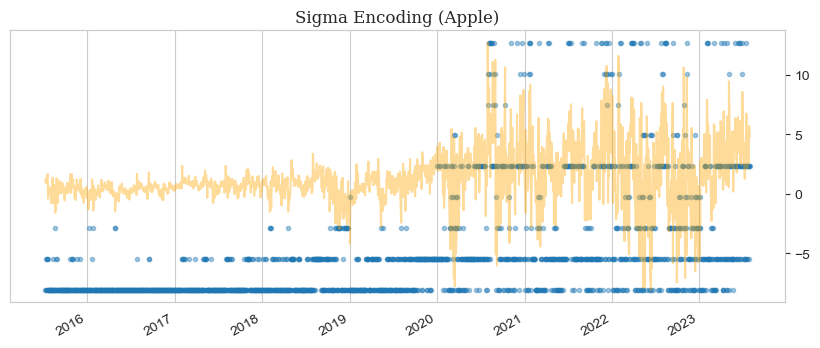

In [42]:
plt.figure(figsize = (10,4))
plt.scatter(ret_sigma.index, ret_sigma, marker = '.', alpha = 0.4)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Sigma Encoding (Apple)', fontfamily = 'Serif', fontsize = 12)

관측치가 장기화될수록 sigma encoding 값이 커지는 것을 알 수 있다. 즉, 정보의 양이 시간에 비례하여 증가한다는 것이다

In [43]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.10912889336230379
Konto's Entropy estimation: 1.2886064415797542


**3.3 Continuous Market Entropy**

아래의 library를 활용하여 연속적인 값을 가정했을 때의 Market Entropy를 추정하라. 추정에는 100기간 Entropy추정량을 사용하도록 한다

In [44]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [60]:
bin = ats.OptimizeBins(len(ret), corr = None)
print('Optimized Bin : ', bin)

Optimized Bin :  19


`OptimizeBins` 함수를 사용하여 최적의 bin값을 찾는다. scipy.stats에서 entorpy함수를 사용하면 연속적인 데이터에서의 Entropy를 계산할 수 있다

In [61]:
etp = []
for i in range(100, len(ret)) :
    hX = ss.entropy(np.histogram(ret[i-100:i], bin)[0])
    etp.append(hX)
etp = pd.DataFrame(etp, index = ret.index[100:])
etp.columns = ['Market Entropy']
etp

,Market Entropy
2015-12-01,2.430139
2015-12-02,2.421104
2015-12-03,2.426226
2015-12-04,2.420881
2015-12-07,2.419448
...,...
2023-07-25,2.544801
2023-07-26,2.604758
2023-07-27,2.594524
2023-07-28,2.587036


Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

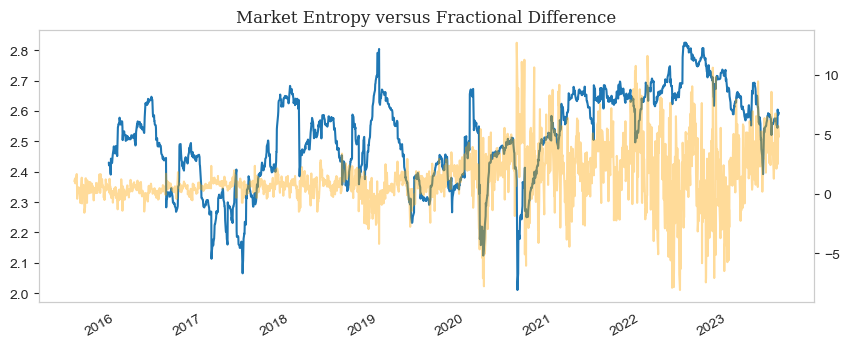

In [47]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus log Price')

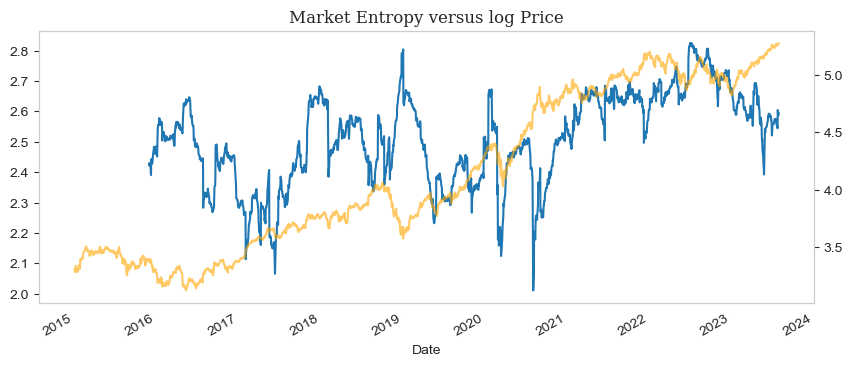

In [48]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.6)
plt.title('Market Entropy versus log Price', fontfamily = 'Serif', fontsize = 12)

#### 3. Bar Sampling

<center><img src = "https://janhove.github.io/posts/2019-04-11-assumptions-relevance/index_files/figure-html/unnamed-chunk-2-1.png" alt="My Image"></center>

OLS Regression을 다시한 번 생각해 보자. 설명변수인 Feature는 정규분포를 따라야 하고 오차항 또한 정규분포를 따라야 한다. 설명변수와 오차항은 서로 독립이어야 한다. 이러한 정규성은 횡단면 자료 분석 뿐만 아니라 시계열 분석에서도 요구되어진다

그러나, 우리가 보는 데이터의 대부분은 정규성 가정에는 거리가 먼 경우가 대부분이다. 대부분의 통계 모형은 정규성이 지켜진다는 가정 하에 세워진 이론이지만, 대부분의 데이터는 이러한 가정이 지켜지지 않아 편향과 오차가 심하게 생길수 밖에 없다

추정과 Machine Learning에서의 예측을 위해 Bar Sampling을 통계학 가정에 좀 더 가까운 형태로 변환하는 Sample 추출 방법에 대해 알아보자

**3.1 Time Bar**

대부분의 python library에서 제공하는 바의 형태는 time bar이다. 이러한 바를 이용함으로써 얻는 정보는 다음과 같다

- Timestamp
- 거래량 가중 평균가
- Open Price
- Close Price
- High Price
- Low Price
- Volume

이러한 time bar는 얻기 쉬운 데이터이지만, 아래와 같은 치명적인 단점을 가지고 있다

1. 시장은 정보를 일정한 시간 간격으로 처리하지 않기 때문에, 일정한 시간 간격으로 추출된 바는 정보의 양이 일정하지 않다
2. 시간에 추출된 바는 좋지 않은 통계적 성질을 보인다

금융시장은 대개 미수주문이 처리되는 개장 직후 30분간의 정보와 폐장 직전 1시간 가량의 정보가 가장 많고, 점심시간인 오후 12시에서 1시 사이에는 정보의 양이 적다. 만약 일정한 시간마다 bar를 추출할 경우 점심시간과 개장 및 폐장 시기의 정보의 양에 차이가 발생할 것이다

**3.2 Tick Bar**

tick bar의 기본적인 아이디어는 간단하다. 앞서 말한 변수들을 사전에 정해 둔 건수가 발생할 때마다 추출하는 것이다. 이렇게 하면 정보의 도착과 표본의 추출을 동기화할 수 있다

Mandelbrot과 Taylor는 표본 추출을 거래 건수에 대한 함수로 수행하면 표본이 바람직한 통계적 성질을 가진다는 것을 처음으로 발견한 사람 중 하나이다. 이들의 발견 이후, 다수의 연구에서 거래 활동에 관한 함수로 표본을 추출하면 IID 정규 분포에 근접한 수익률을 얻을 수 있다는 것이 확인되었다. 대다수의 통계 모형과 기계학습 모형이 표본을 IID로 가정하고 추정되므로 이는 매우 중요한 성질 중 하나이다. 따라서, Tick Bar는 Time Bar에 비해 더 좋은 통계적 추론이 가능하다.

**3.3 Volume Bar**

tick bar의 문제점 중 하나는 threshold가 주문의 파편성으로 임의적이라는 것이다. 예를 들어, 크기가 10인 주문이 들어오면 그 거래는 하나의 틱으로 기록된다. 반면에 크기가 1인 주문이 10개가 쌓여 있다면 그 주문의 집합은 10개의 개별 주문으로 기록될 것이다. 거래량 바는 임의로 정해진 tick의 개수가 아닌 volume에 의해 추출된다. 주문의 크기에 구애받지 않고 거래가 일정한 수에 도달할 때마다 표본을 추출할 수 있다. Clark는 Tick bar에 의해 추출된 샘플보다 Volume bar가 더 나은 통계적 성질을 가진다는 것을 알아 냈다

**3.4 Dollar Value Bar**

Dollar value bar는 사전에 정해 둔 시장가치 (market value)가 거래될 때마다 관측값을 표본 추출하는 것이다. volume bar에 비해 액면분할 혹은 병합으로 인해 주식 수를 조정하는 경우의 주식 발행이나 자사주 매입과 같이 기업의 재무 활동에 비해 강건한 경향을 보이기 때문에 좋은 표본 추출 방법이다

#### example 4

S&P 500 futures 가격 계열에 대하여 다음 물음에 답하라

**4.1 Data import**

pandas의 `read_parquet`함수를 통해 S&P500 선물 틱데이터를 불러오라

In [49]:
futures = pd.read_parquet('clean_IVE_fut_prices.parq')
futures

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


**4.2 Tick Bar**

표본 추출 틱 개수를 100으로 지정하여 Tick Bar를 추출하라. 적절한 방법으로 시각화하라

In [50]:
tick_M = 100
tick_df = ats.BarSampling(futures, 'price', tick_M, tick = True).dropna()
tick_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:53:14,51.1500,51.15,51.18,100,100,5115.0000
2009-09-28 10:02:52,51.2500,51.24,51.26,2000,2000,102500.0000
2009-09-28 10:22:24,51.1961,51.19,51.20,1100,1100,56315.7100
2009-09-28 10:38:44,51.3650,51.36,51.36,100,100,5136.5000
2009-09-28 11:24:29,51.3200,51.32,51.33,2000,2000,102640.0000
...,...,...,...,...,...,...
2018-10-05 14:21:02,116.1167,116.11,116.12,100,100,11611.6700
2018-10-05 14:56:39,116.0600,116.06,116.07,274,274,31800.4400
2018-10-05 15:37:49,116.0565,116.05,116.06,559,559,64875.5835


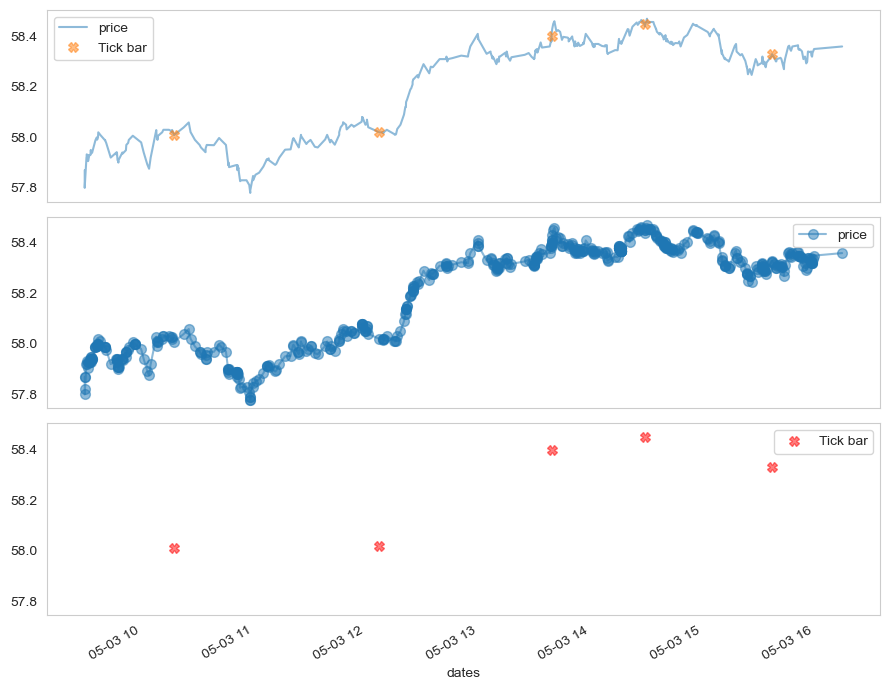

In [51]:
xDate = '2010-05-03'
xdf, xtdf = ats.select_sample_data(futures, tick_df, 'price', xDate)
ats.plotSampleData(xdf, xtdf, 'Tick bar', alpha = 0.5, markersize = 7)

**4.3 Volume Bar**

표본 추출 Volume 용량을 10000으로 지정하여 Volume Bar를 추출하라. 적절한 방법으로 시각화하라

In [52]:
volume_M = 10000
volume_df = ats.BarSampling(futures, 'v', volume_M)
volume_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:44:09,50.9100,50.91,50.92,1100,1100,56001.00
2009-09-28 09:46:35,51.0700,51.05,51.07,3300,3300,168531.00
2009-09-28 09:52:47,51.1300,51.13,51.14,2000,2000,102260.00
2009-09-28 09:54:36,51.1300,51.11,51.13,400,400,20452.00
2009-09-28 09:54:41,51.1400,51.13,51.14,700,700,35798.00
...,...,...,...,...,...,...
2018-10-05 15:58:08,116.1800,116.17,116.18,451,451,52397.18
2018-10-05 15:59:16,116.1969,116.19,116.20,800,800,92957.52
2018-10-05 15:59:46,116.2100,116.19,116.21,900,900,104589.00


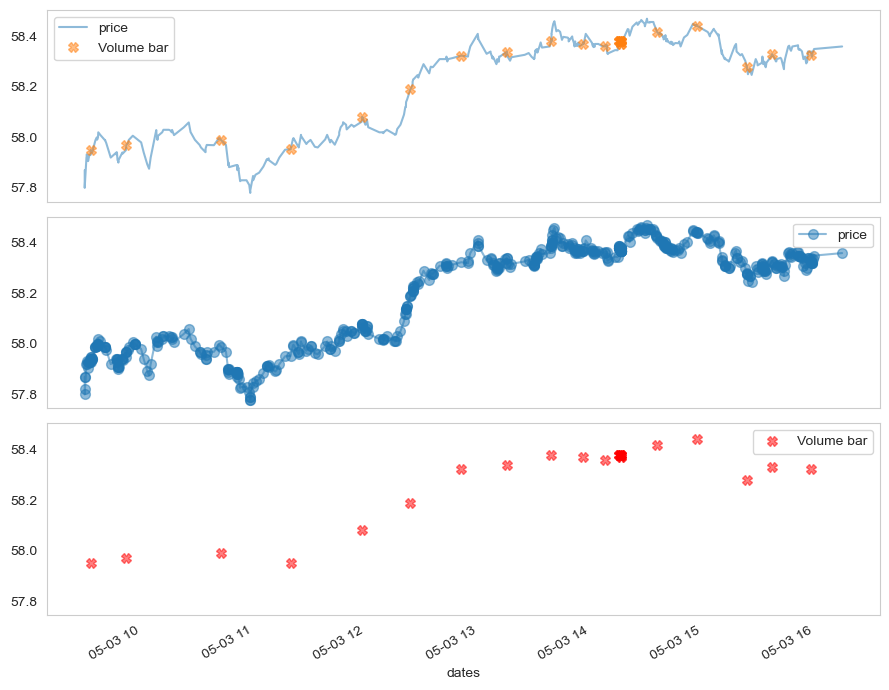

In [53]:
xdf, xtdf = ats.select_sample_data(futures, volume_df, 'price', xDate)
ats.plotSampleData(xdf, xtdf, 'Volume bar', alpha = 0.5, markersize = 7)

**4.4 Dollar Value Bar**

표본 추출 달러 가치 금액을 1,000,000으로 지정하여 Dollar Value Bar를 추출하라. 적절한 방법으로 시각화하라

In [54]:
dollar_M = 1000000
dollar_df = ats.BarSampling(futures, 'dv', dollar_M)
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


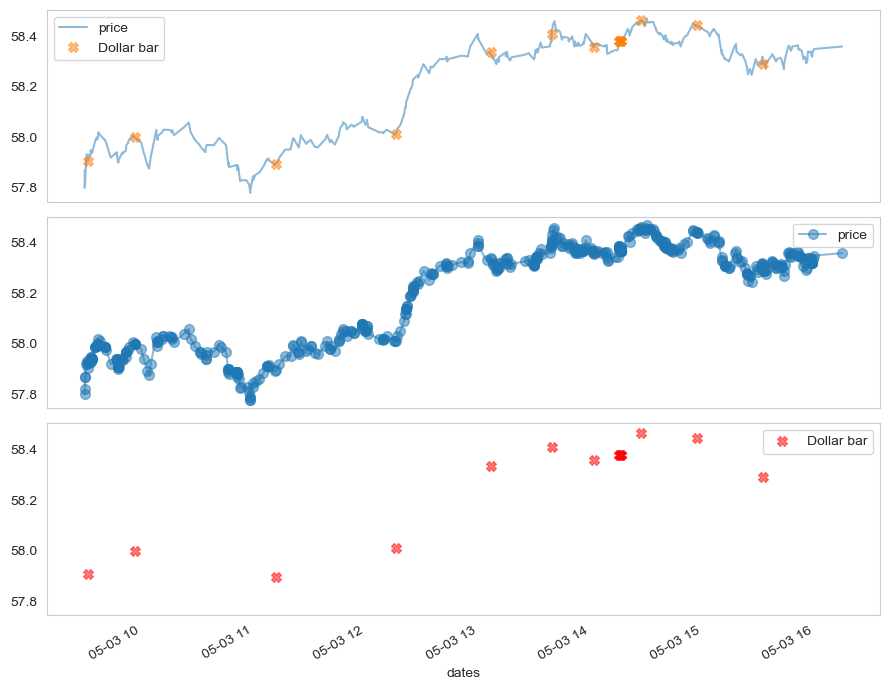

In [55]:
xdf, xtdf = ats.select_sample_data(futures, dollar_df, 'price', xDate)
ats.plotSampleData(xdf, xtdf, 'Dollar bar', alpha = 0.5, markersize = 7)

**4.5 통계적 특성**

tick bar, volume bar, dollar value bar에 대해 1주일당 샘플링 횟수와 통계적 분포를 적절한 시각화 방법을 통해 확인하라

In [56]:
def count_bars(df, price_col = 'price'):
    return df.groupby(pd.Grouper(freq = '1W'))[price_col].count()

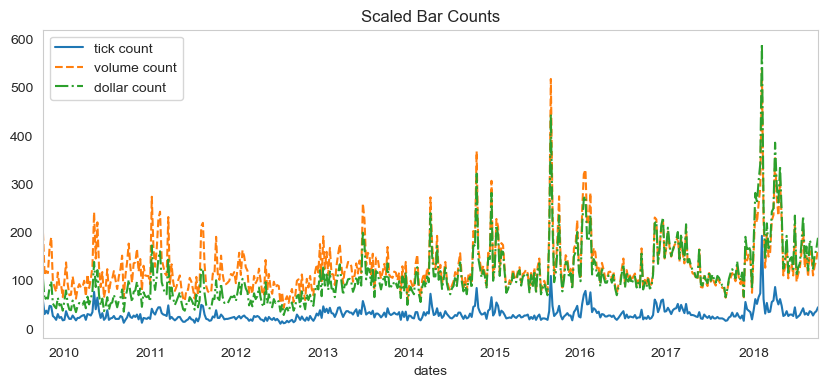

In [77]:
tc = count_bars(tick_df)
vc = count_bars(volume_df)
dc = count_bars(dollar_df)
dfc = count_bars(futures)
ats.plot_bar_counts(tc, vc, dc)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


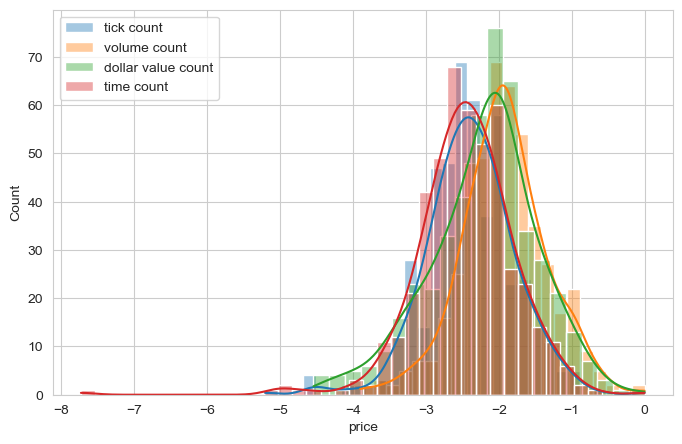

In [62]:
fig, ax1 = plt.subplots(figsize = (8,5), dpi = 100)
sns.histplot(np.log(tc), kde = True, label = 'tick count', ax = ax1, alpha = 0.4)
sns.histplot(np.log(vc), kde = True, label = 'volume count', ax = ax1, alpha = 0.4)
sns.histplot(np.log(dc), kde = True, label = 'dollar value count', ax = ax1, alpha = 0.4)
sns.histplot(np.log(dfc), kde = True, label = 'time count', ax = ax1, alpha = 0.4)
plt.legend()

**4.6 Auto Agressive Model**

Dollar Value Bar에 대해 적절한 기간을 선택하여 $\mathrm{ARMA}$모형을 추정하라. order는 얼마가 적당한가? 추정된 모형은 time bar 모형에 비해서 효율적인가?

In [65]:
dv = np.log(dollar_df.price)

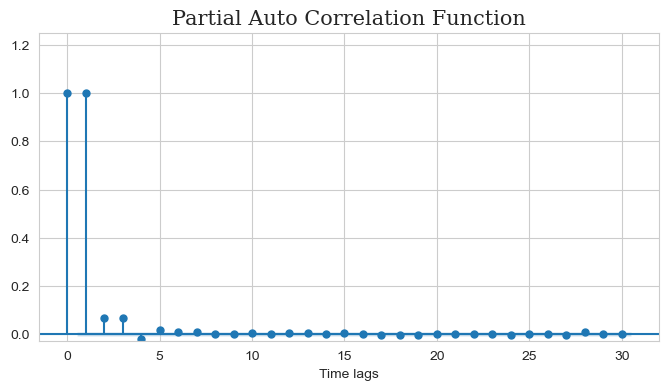

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(dv, auto_ylims = True, lags = 30, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

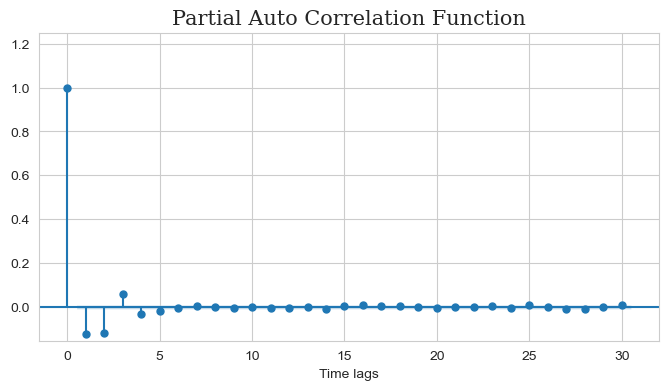

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf((dv - dv.shift(1)).dropna(), auto_ylims = True, lags = 30, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [79]:
model = sm.tsa.ARIMA(dv, order = (10,0,11), trend = 'c').fit()
print(model.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                50766
Model:               ARIMA(10, 0, 11)   Log Likelihood              227372.531
Date:                Mon, 28 Aug 2023   AIC                        -454699.061
Time:                        20:38:31   BIC                        -454495.857
Sample:                             0   HQIC                       -454635.454
                              - 50766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4494   2.26e-06   1.97e+06      0.000       4.449       4.449
ar.L1          1.1071   7.46e-05   1.48e+04      0.000       1.107       1.107
ar.L2         -0.2809      0.000  -2140.325      0.0

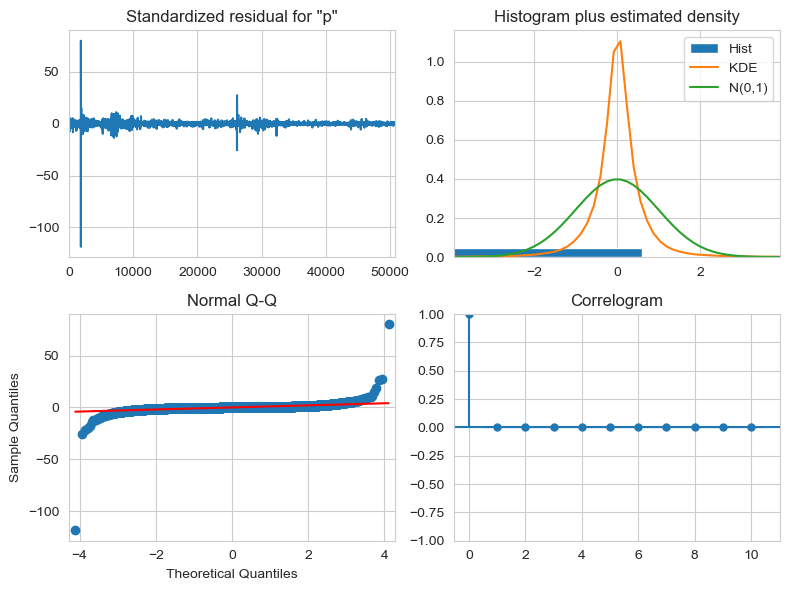

In [84]:
model.plot_diagnostics(figsize = (8,6))
plt.tight_layout()
plt.show()